## Vehicle routing problems. We start by creating a distance matrix using the Manhattan distance. This distance matrix will be reused in all problems.

In [1]:
import plotly.express as px
import pandas_or as pr
from pandas_or import solve_routing

In [2]:
locations = pr.data.locations()

locations["locationId"] = locations.index
distances = locations[["x", "y", "locationId"]].merge(
    locations[["x", "y", "locationId"]], how="cross", suffixes=("_1", "_2")
)
distances["distance"] = (distances["x_1"] - distances["x_2"]).abs() + (
    distances["y_1"] - distances["y_2"]
).abs()
distance_matrix = distances.pivot(
    index="locationId_1", columns="locationId_2", values="distance"
)

## Example 1: Multiple vehicles starting from same depot

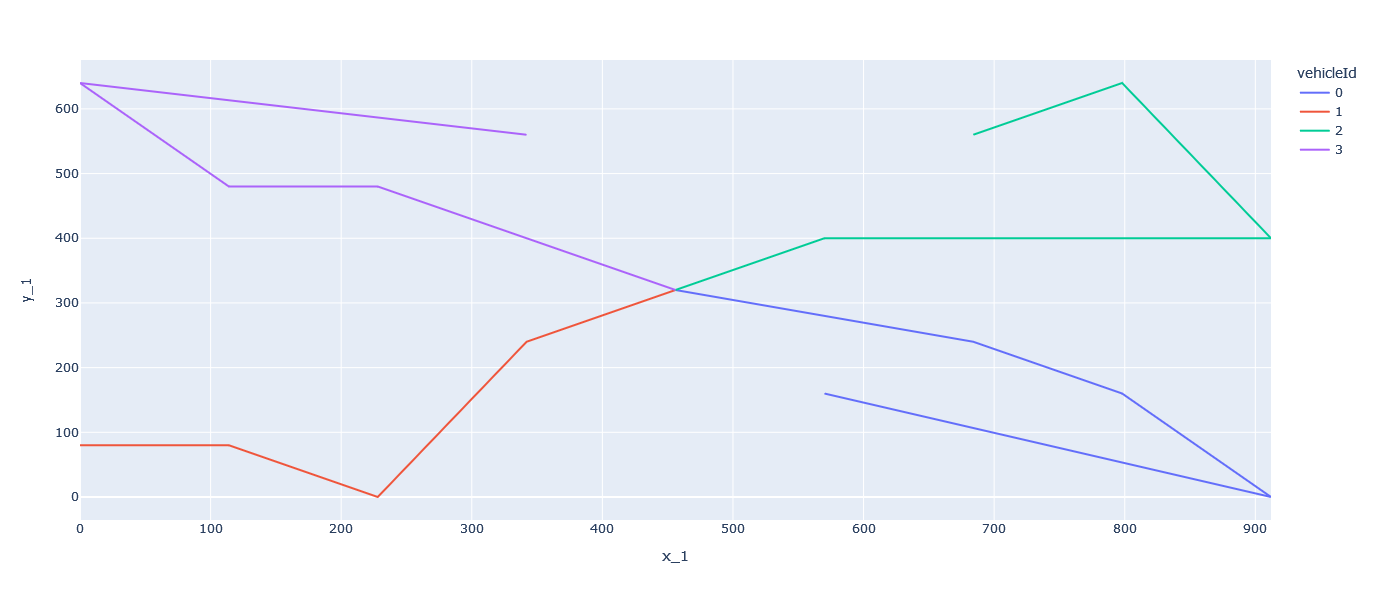

In [4]:
trips = solve_routing(distance_matrix, vehicles=4)

trips = trips.merge(distances, left_on="departure", right_on="locationId_1")
fig = px.line(trips, x="x_1", y="y_1", color="vehicleId", hover_data=["departure"], height=600)
fig

## Example 2: Multiple vehicles with various capacities and various loads to drop off at different locations

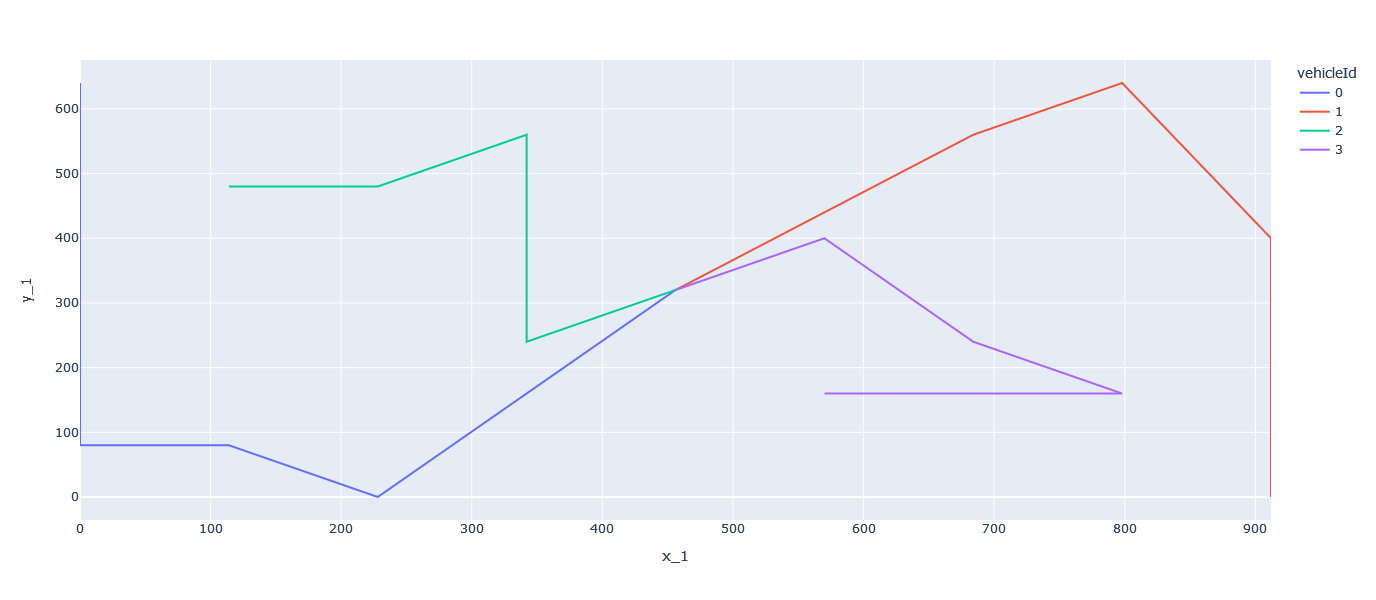

In [16]:
vehicles = pr.data.vehicles(with_capacity=True)
vehicles["vehicleId"] = vehicles.index

trips = solve_routing(
    distance_matrix, vehicles=vehicles, locations=locations, starting_point=0
)

trips = trips.merge(distances, left_on="departure", right_on="locationId_1")
fig = px.line(trips, x="x_1", y="y_1", color="vehicleId", hover_data=["departure"], height=600)
fig